In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("comparison.csv")

In [5]:
df['random'] = [x.startswith("RND") for x in df.split]

In [10]:
df_rnd = df.query("random")
df_scaf = df.query("random == False")

In [11]:
df_rnd

,dataset,split,gp_r2,xgb_r2,ffnn_r2,gp_rmse,xgb_rmse,ffnn_rmse,random
0,A2a,RND_00,0.752814,0.563589,0.707086,0.675240,0.897209,0.735048,True
1,A2a,RND_01,0.595350,0.214099,0.485521,0.856176,1.193183,0.965399,True
2,A2a,RND_02,0.617880,0.394742,0.599878,0.809310,1.018556,0.828154,True
3,A2a,RND_03,0.688750,0.687382,0.608980,0.675124,0.676605,0.756707,True
4,A2a,RND_04,0.496913,-0.027546,0.343654,0.633364,0.905175,0.723433,True
...,...,...,...,...,...,...,...,...,...
465,opioid,RND_05,0.629443,0.561676,0.534422,0.697372,0.758464,0.781688,True
466,opioid,RND_06,0.758506,0.664784,0.714716,0.599983,0.706885,0.652116,True
467,opioid,RND_07,0.671188,0.580889,0.638506,0.699050,0.789221,0.732968,True
468,opioid,RND_08,0.706622,0.615326,0.695369,0.658198,0.753684,0.670702,True


In [12]:
df_scaf

,dataset,split,gp_r2,xgb_r2,ffnn_r2,gp_rmse,xgb_rmse,ffnn_rmse,random
10,A2a,SCAF_00,0.012976,-0.301353,-0.009199,1.044128,1.198912,1.055791,False
11,A2a,SCAF_01,0.374401,0.386379,0.179652,0.690116,0.683478,0.790266,False
12,A2a,SCAF_02,0.597798,0.757998,0.702588,1.059375,0.821745,0.910976,False
13,A2a,SCAF_03,0.287627,-0.280969,0.354050,0.840977,1.127716,0.800811,False
14,A2a,SCAF_04,0.642142,0.685189,0.680285,1.040471,0.975887,0.983459,False
...,...,...,...,...,...,...,...,...,...
475,opioid,SCAF_05,0.640667,0.520661,0.603940,0.668501,0.772103,0.701833,False
476,opioid,SCAF_06,0.784424,0.603436,0.709108,0.578612,0.784773,0.672131,False
477,opioid,SCAF_07,0.640238,0.557889,0.566575,0.761375,0.844028,0.835696,False
478,opioid,SCAF_08,0.589945,0.512827,0.474636,0.833841,0.908874,0.943827,False


In [18]:
def draw_boxplots(df):
    r2_cols = ["dataset"] + [x for x in df.columns if x.find("r2") > 0]
    rms_cols = ["dataset"] + [x for x in df.columns if x.find("rms") > 0]
    r2_df = df[r2_cols].melt(id_vars="dataset")
    rms_df = df[rms_cols].melt(id_vars="dataset")
    r2_df.columns = ['Dataset',"algorithm","R2"]
    rms_df.columns = ['Dataset',"algorithm","RMSE"]
    r2_df['Method'] = [x.split("_")[0].upper() for x in r2_df.algorithm]
    rms_df['Method'] = [x.split("_")[0].upper() for x in rms_df.algorithm]
    sns.set(rc={'figure.figsize': (15, 12)})
    sns.set_context('talk')
    ax = sns.boxplot("R2","Dataset",data=r2_df,orient="h",hue="Method")
    for i in range(0,24):
        ax.axhline(0.5+i,linestyle="--",color="grey")
    plt.show()
    ax = sns.boxplot("RMSE","Dataset",data=rms_df,orient="h",hue="Method")
    for i in range(0,24):
        ax.axhline(0.5+i,linestyle="--",color="grey")
    plt.show()

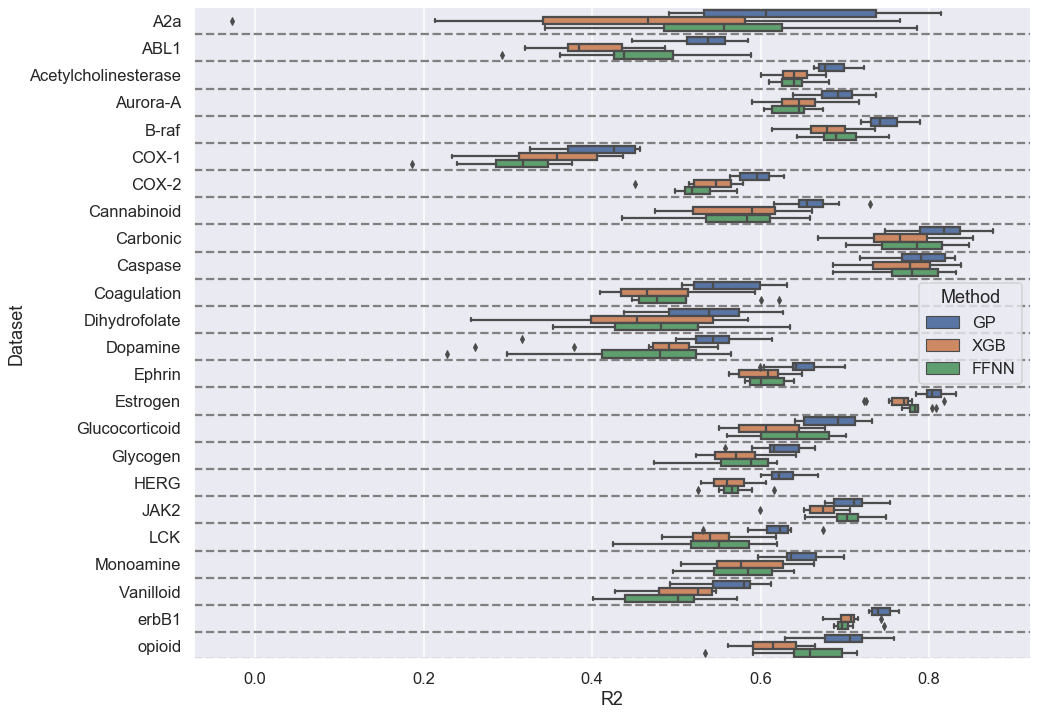

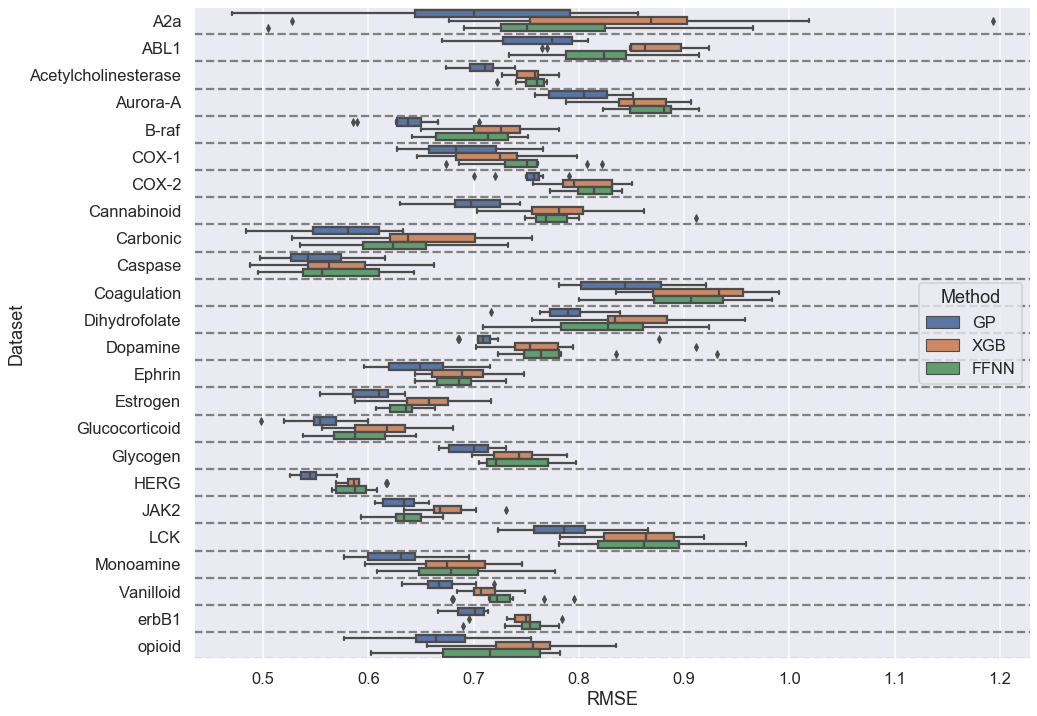

In [20]:
draw_boxplots(df_rnd)

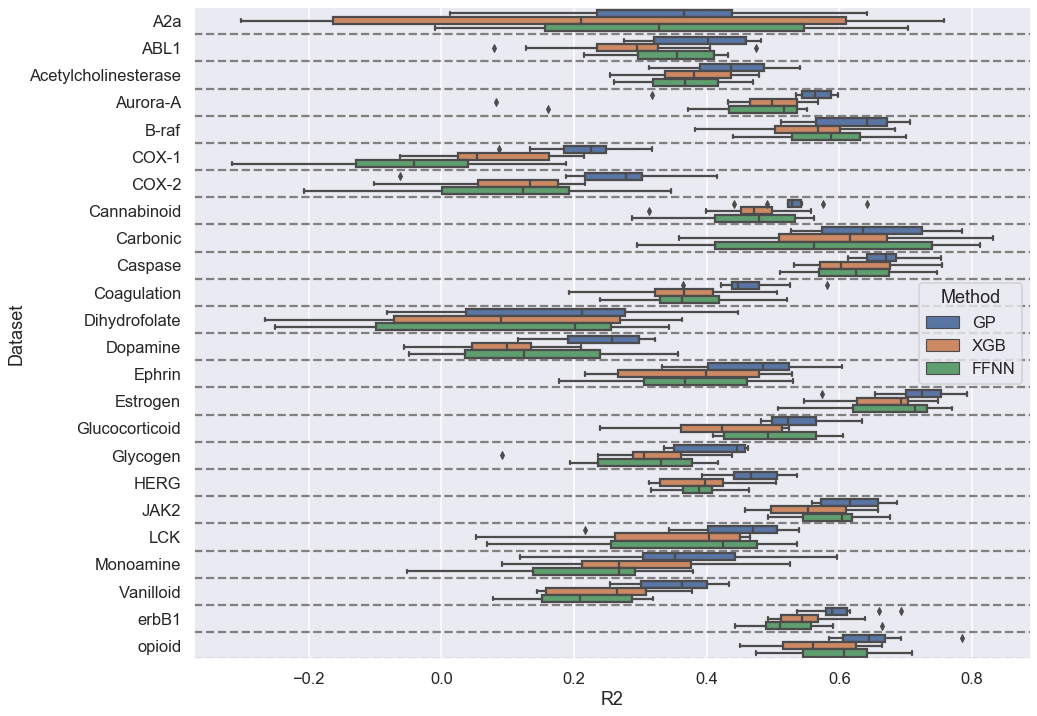

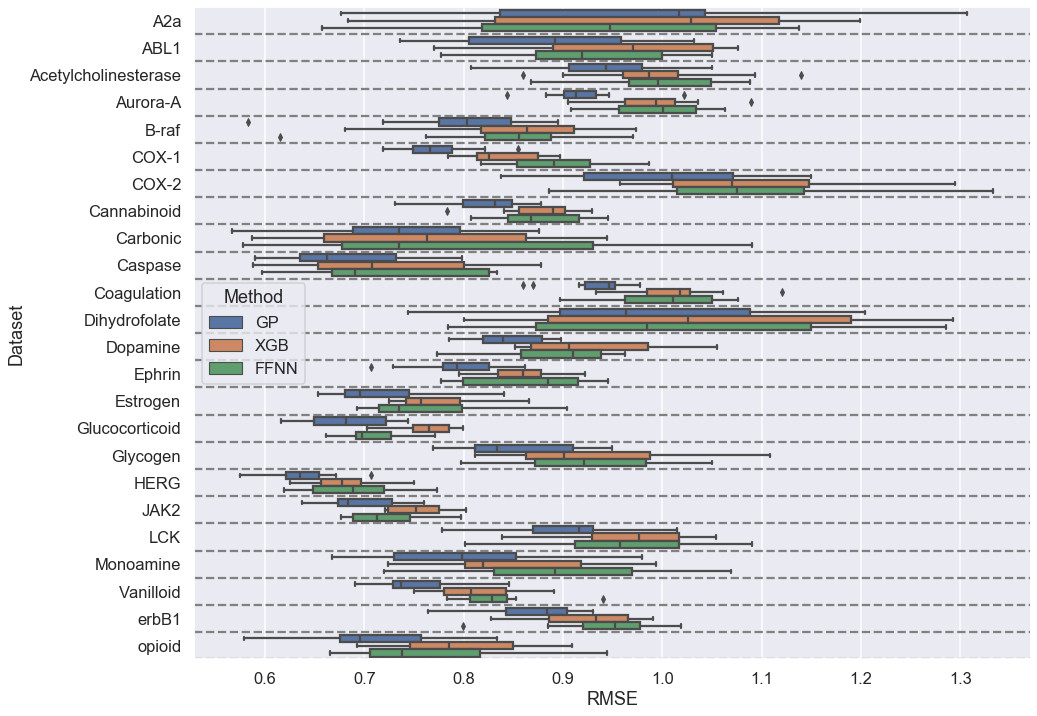

In [22]:
draw_boxplots(df_scaf)

In [50]:
r2_cols = ["dataset"] + [x for x in df.columns if x.find("r2") > 0]
rms_cols = ["dataset"] + [x for x in df.columns if x.find("rms") > 0]

In [52]:
r2_df = df[r2_cols].melt(id_vars="dataset")
rms_df = df[rms_cols].melt(id_vars="dataset")

In [53]:
r2_df.columns = ['Dataset',"algorithm","R2"]
rms_df.columns = ['Dataset',"algorithm","RMSE"]

In [54]:
r2_df['Method'] = [x.split("_")[0].upper() for x in r2_df.algorithm]
rms_df['Method'] = [x.split("_")[0].upper() for x in rms_df.algorithm]

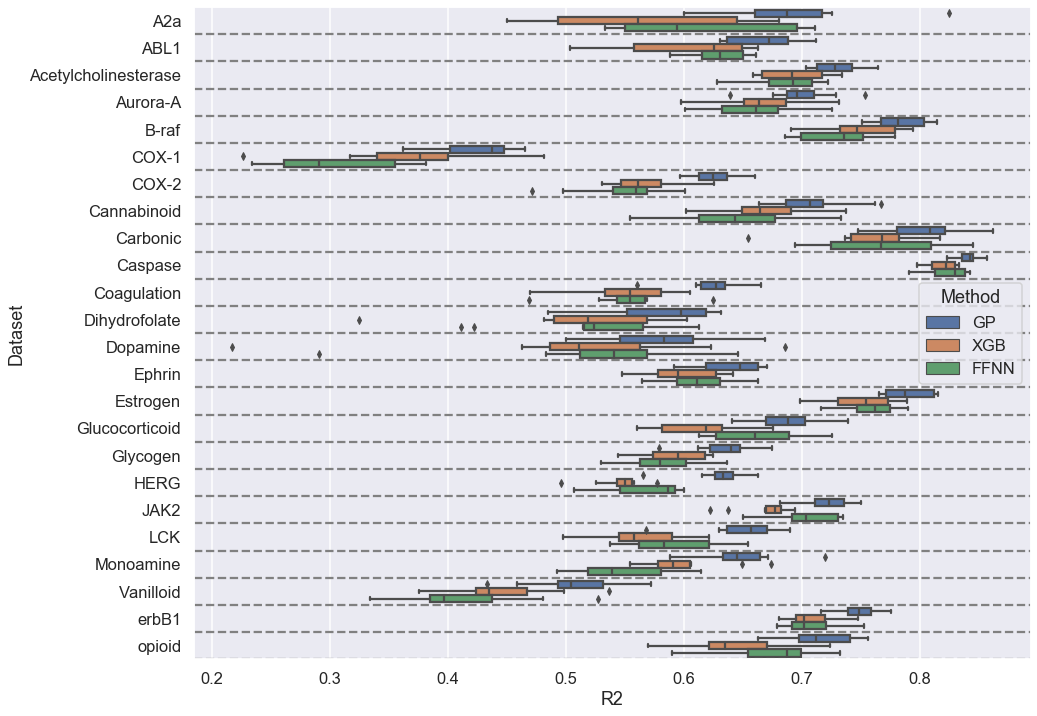

In [49]:
sns.set(rc={'figure.figsize': (15, 12)})
sns.set_context('talk')
ax = sns.boxplot("R2","Dataset",data=r2_df,orient="h",hue="Method")
for i in range(0,24):
    ax.axhline(0.5+i,linestyle="--",color="grey")

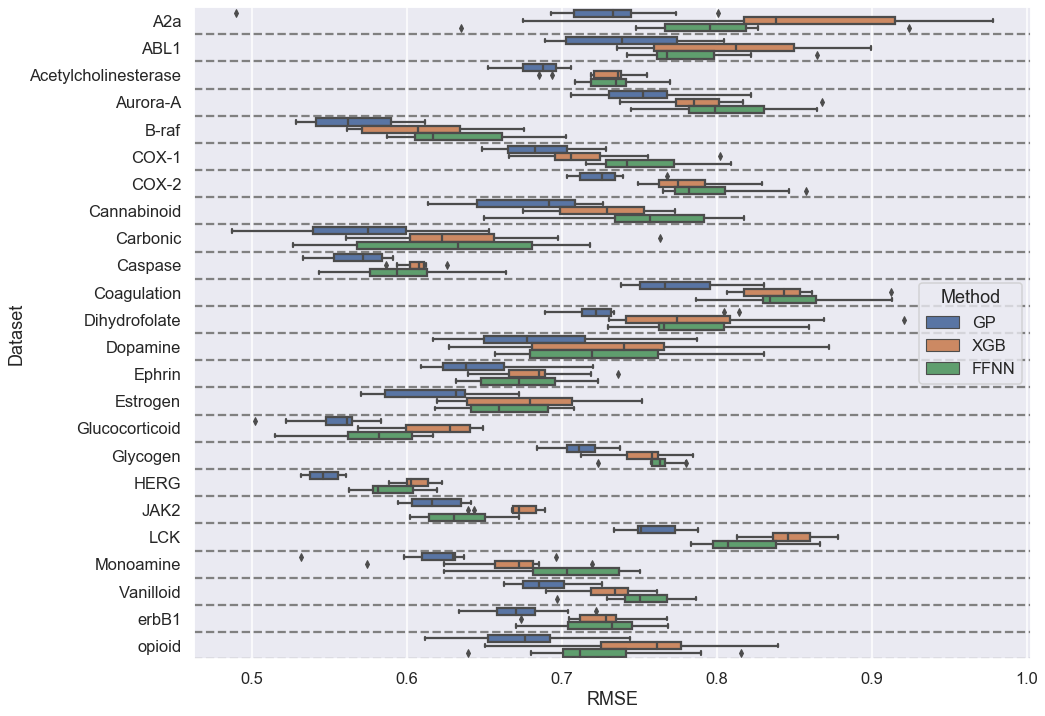

In [55]:
sns.set(rc={'figure.figsize': (15, 12)})
sns.set_context('talk')
ax = sns.boxplot("RMSE","Dataset",data=rms_df,orient="h",hue="Method")
for i in range(0,24):
    ax.axhline(0.5+i,linestyle="--",color="grey")